In [1]:
import os
import pandas as pd

# Need to add get_importances() to all and snapshot_model() to all
## Should return an importance for every feature
And then rerun with correctly selected features

In [2]:
os.chdir('C:\\Users\\keato\\Documents\\LocalRStudio\\LJ_Leading_Indicators')
data = pd.read_csv("data/out/features.csv")

In [3]:
os.getcwd()
from scripts.churn_functions import out_eval
from sklearn.metrics import mean_squared_error, r2_score
from models.dev.scripts.predict_all import run_predict

In [4]:
run_predict(data = data, split = 135, ahead=6, save = True)

KeyboardInterrupt: 

In [32]:
from models.dev.scripts.linear import linear_regression
from models.dev.scripts.tree import decision_tree
from models.dev.scripts.random import random_forest
from models.dev.scripts.arima import arima
from models.dev.scripts.gru import gru
from models.dev.scripts.lstm import lstm

from sklearn.metrics import r2_score, mean_squared_error
import torch
from torch.autograd import Variable 
from torch import nn

data = pd.read_csv("data/out/features.csv")

split = (147)

'C:\\Users\\keato\\Documents\\LocalRStudio\\LJ_Leading_Indicators'

In [33]:
l = linear_regression()
l.fit(data = data, 
              split = split,
              scoring = "neg_mean_squared_error",
              feature_selection = True)

t = decision_tree()
t.fit(data = data, 
              split = split,
              scoring = "neg_mean_squared_error",
              feature_selection = True)

r = random_forest()
# takes a little bit
r.fit(data = data, 
              split = split,
              scoring = "neg_mean_squared_error",
              feature_selection = True)

a = arima()
a.fit(data = data, 
      split = split,
      feature_selection = True,
      order=(12, 1, 0)
     )

In [34]:
l.predict(ahead = 6)
t.predict(ahead = 6)
r.predict(ahead = 6)
a.predict(ahead = 6)

Train: 1918.3703738448366 
Test: 5158.14958788542


(1918.3703738448366, 5158.14958788542)

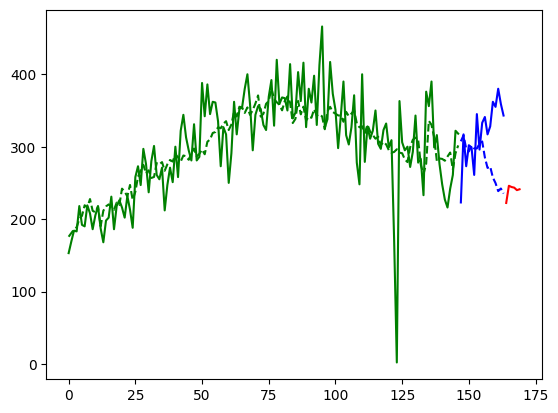

In [42]:
out_eval(.full, criterion=mean_squared_error, verbose = 2)

Epoch: 0, train loss: 0.78327, test loss: 0.22681
Epoch: 10, train loss: 0.04664, test loss: 0.03266
Epoch: 20, train loss: 0.02836, test loss: 0.06905
Epoch: 30, train loss: 0.02070, test loss: 0.00833
Epoch: 40, train loss: 0.01578, test loss: 0.02524
Epoch: 50, train loss: 0.01291, test loss: 0.01111
Epoch: 60, train loss: 0.01151, test loss: 0.01100
Epoch: 70, train loss: 0.01087, test loss: 0.01113
Epoch: 80, train loss: 0.01026, test loss: 0.01020
Epoch: 90, train loss: 0.00972, test loss: 0.01050
Train: 2001.4110038035587 
Test: 2321.353366896545


(2001.4110038035587, 2321.353366896545)

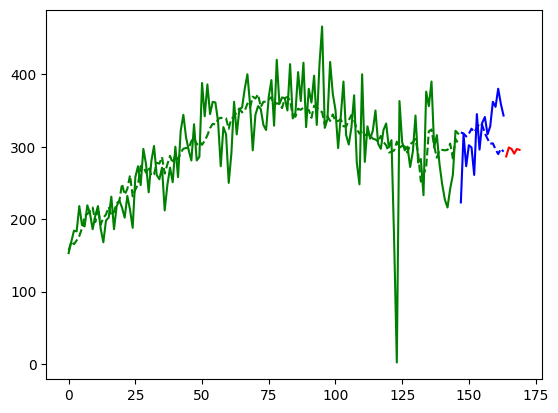

In [43]:
g = gru()
g.fit(data = data, split = split, hidden_size= 32, num_epochs= 100, verbose = 2)
g.predict(ahead= 6)
out_eval(g.full, criterion=mean_squared_error, verbose = 2)

In [44]:
gimp = g.get_importances(15, names = True)
gimp

array(['carcpi_lag12', 'industrycg_lag9', 'F_lag12', 'year', 'AN_lag12',
       'TM_lag12', 'XOM_lag6', 'kwhcost_lag6', 'stuffcpi_lag12',
       'localrent_lag9', 'prodmanuf_lag9', 'new_units_lag12',
       'hcpiurban_lag9', 'g_car_for_sale_near_me_lag12', 'caput_lag9'],
      dtype=object)

Epoch: 0, train loss: 0.34388, test loss: 0.12599
Epoch: 20, train loss: 0.02699, test loss: 0.01018
Epoch: 40, train loss: 0.01453, test loss: 0.01737
Epoch: 60, train loss: 0.01318, test loss: 0.02220
Epoch: 80, train loss: 0.01268, test loss: 0.02167
Epoch: 100, train loss: 0.01204, test loss: 0.01769
Epoch: 120, train loss: 0.01162, test loss: 0.01468
Epoch: 140, train loss: 0.01124, test loss: 0.01173
Epoch: 160, train loss: 0.01092, test loss: 0.00907
Epoch: 180, train loss: 0.01064, test loss: 0.00660
Train: 2239.5630968996024 
Test: 1272.4546992090884


(2239.5630968996024, 1272.4546992090884)

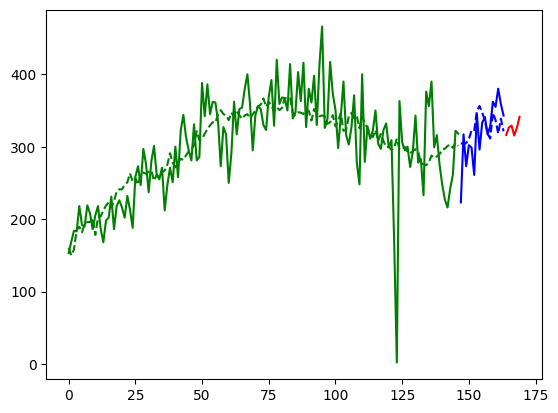

In [46]:
g.fit(data = data, split = split, hidden_size= 16, num_epochs= 200, feature_selection=gimp, verbose = 2)
g.predict(ahead = 6)
out_eval(g.full, criterion=mean_squared_error, verbose = 2)

Epoch: 0, train loss: 0.40676, test loss: 0.32019
Epoch: 10, train loss: 0.06861, test loss: 0.03641
Epoch: 20, train loss: 0.03332, test loss: 0.02100
Epoch: 30, train loss: 0.01748, test loss: 0.01564
Epoch: 40, train loss: 0.01361, test loss: 0.00975
Epoch: 50, train loss: 0.01328, test loss: 0.00702
Epoch: 60, train loss: 0.01229, test loss: 0.00814
Epoch: 70, train loss: 0.01159, test loss: 0.00759
Epoch: 80, train loss: 0.01088, test loss: 0.00690
Epoch: 90, train loss: 0.01014, test loss: 0.00673
Train: 2023.8238679850774 
Test: 1659.3254939102924


(2023.8238679850774, 1659.3254939102924)

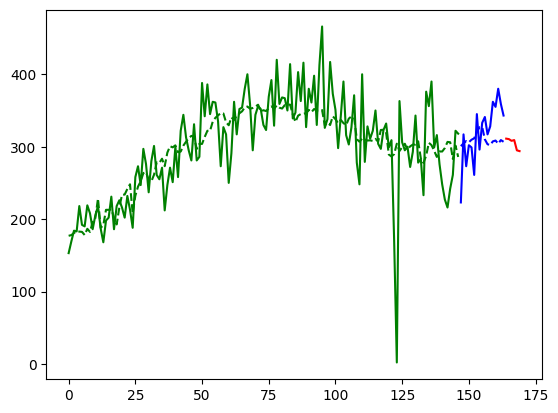

In [54]:
m = lstm()
m.fit(data = data, split = split, hidden_size= 8, num_epochs= 100, verbose = 2)
m.predict(ahead = 6)
out_eval(m.full, criterion=mean_squared_error, verbose = 2)

Train: 2023.8238679850774 
Test: 1659.3254939102924


(2023.8238679850774, 1659.3254939102924)

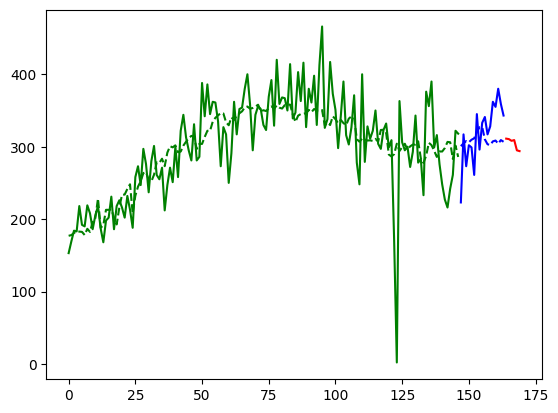

In [55]:
out_eval(m.full, criterion=mean_squared_error, verbose = 2)

For a model class, it needs to have 
    - fit method, which will take in most arguments and update model attribute
    - bake method, which will predict and return
    
    - need data attributes, cv attributes, features_in, targetvar, split, features_out, model itself, and out

In [19]:
def expand_grid(splits, eval_scoring):
        aG, bG = np.meshgrid(list(splits), list(eval_scoring)) # create the actual grid
        aG = aG.flatten() # make the grid 1d
        bG = bG.flatten()
        return pd.DataFrame({
            'splits':aG, 
            'eval_scoring':bG})

expand_grid(splits = [(117, 119), (125, 130), (130, 135)], eval_scoring= [mean_squared_error, r2_score])

,splits,eval_scoring
0,117,<function mean_squared_error at 0x000002ADC461...
1,119,<function mean_squared_error at 0x000002ADC461...
2,125,<function mean_squared_error at 0x000002ADC461...
3,130,<function mean_squared_error at 0x000002ADC461...
4,130,<function mean_squared_error at 0x000002ADC461...
5,135,<function mean_squared_error at 0x000002ADC461...
6,117,<function r2_score at 0x000002ADC46196C0>
7,119,<function r2_score at 0x000002ADC46196C0>
8,125,<function r2_score at 0x000002ADC46196C0>
9,130,<function r2_score at 0x000002ADC46196C0>


In [20]:
def train_all(split, criterion):
    from models.dev.prediction.scripts.linear import linear_regression
    from models.dev.prediction.scripts.tree import decision_tree
    from models.dev.prediction.scripts.random import random_forest

    data = pd.read_csv("data/out/features.csv")
    
    # save results to df
    df = pd.DataFrame(columns = ['split',
                         'scoring_method', 
                         'train_score', 
                         'eval_score'])
    
    l = linear_regression()
    t = decision_tree()
    r = random_forest()
    
    l.fit(data = data, 
                  split = split,
                  scoring = "neg_mean_squared_error",
                  feature_selection = True)

    t.fit(data = data, 
                  split = split,
                  scoring = "neg_mean_squared_error",
                  feature_selection = True)

    # takes a little bit
    r.fit(data = data, 
                  split = split,
                  scoring = "neg_mean_squared_error",
                  feature_selection = True)

    l.predict()
    t.predict()
    r.predict()

    # compose df
    df.loc['lm'] = [split, criterion.__name__, out_eval(l.full, criterion)[0], out_eval(l.full, criterion)[1]]

    df.loc['tree'] = [split, criterion.__name__, out_eval(t.full, criterion)[0], out_eval(t.full, criterion)[1]]
    
    df.loc['rf'] = [split, criterion.__name__, out_eval(r.full, criterion)[0], out_eval(r.full, criterion)[1]]

    return df

In [33]:
train_all(split = 117, criterion=mean_squared_error)

,split,scoring_method,train_score,eval_score
lm,117,mean_squared_error,910.776837,6468.894566
tree,117,mean_squared_error,982.942894,6286.495117
rf,117,mean_squared_error,182.112869,5392.636877


In [21]:
full = pd.DataFrame(columns = ['model',
                               'split', 
                                'scoring_method',
                                      'train_score',
                                     'eval_score'])
for i in range(20, 135, 5):
    
    pdf = train_all(split = (i, 135),
                   criterion = mean_squared_error)
    
    pdf.reset_index(inplace=True)
    
    pdf = pdf.rename(columns = {'index':'model'})
    
    full = pd.concat([pdf, full], ignore_index = True)

C:\Users\keato\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.314e+00, tolerance: 1.955e+00
  model = cd_fast.enet_coordinate_descent(


,n,10yinf_lag9,BWA_lag3,caput_lag9,cbpy30_lag6,discount_lag3,fedfundseff_lag3,fedsurplus_lag6,g_best_new_cars_lag9,g_cars_for_sale_lag9,...,retail_lag9,sahmrule_lag9,treasurymat1_lag6,treasurymat10_lag6,treasurymat5_lag6,treasurymat7_lag6,unemp15to26w_lag9,unemp27ov_lag3,XOM_lag3,year
n,1.000000,-0.213306,-0.292134,0.403702,-0.148330,0.216254,0.225922,0.120776,0.014408,-0.032022,...,0.226788,-0.070904,0.219000,-0.033699,0.176350,0.092140,-0.193721,-0.527003,0.249201,0.278859
industry_lag9,0.496184,0.071375,-0.350680,0.906502,-0.182998,0.480380,0.487391,0.096793,0.012848,0.059622,...,0.468638,-0.439155,0.505942,0.120765,0.432532,0.303956,-0.471779,-0.772611,0.295032,0.468376
pempltot_lag9,0.460762,-0.213985,-0.721437,0.728054,-0.505770,0.667605,0.662510,-0.105258,-0.058041,0.241440,...,0.756135,-0.074481,0.694007,-0.077636,0.441273,0.217967,-0.564920,-0.947661,-0.064148,0.872736
pemplmanuf_lag6,0.425111,-0.025884,-0.585530,0.811438,-0.312324,0.694202,0.696913,0.107977,-0.014413,0.142220,...,0.616025,-0.280483,0.729672,0.089703,0.540921,0.346822,-0.619096,-0.907502,0.160982,0.693389
caput_lag9,0.403702,0.226221,-0.363982,1.000000,-0.181894,0.591572,0.583723,0.022493,0.073281,0.121579,...,0.619659,-0.478507,0.594003,0.148375,0.489382,0.345703,-0.503043,-0.769667,0.358417,0.559449
LEA_lag3,0.357798,-0.259112,-0.605078,0.393243,-0.555845,0.401013,0.387293,-0.098387,-0.076502,0.444626,...,0.641463,0.256393,0.385445,-0.137251,0.256333,0.098080,-0.265245,-0.687119,-0.211360,0.764428
kwhcost_lag3,0.342589,-0.130195,-0.700052,0.555292,-0.584987,0.615406,0.596771,-0.213521,-0.061719,0.454389,...,0.899709,0.185834,0.607572,-0.164392,0.329170,0.114916,-0.403551,-0.790537,-0.177716,0.957584
industrycg_lag9,0.291098,0.230188,-0.311574,0.807225,0.050006,0.474217,0.465724,0.040851,0.159815,0.221080,...,0.499700,-0.386040,0.463878,0.282753,0.483994,0.416494,-0.226075,-0.505771,0.375777,0.365175
year,0.278859,-0.088406,-0.687502,0.559449,-0.655354,0.580280,0.555650,-0.232156,-0.050858,0.510887,...,0.934990,0.223467,0.563960,-0.232246,0.270163,0.048913,-0.379753,-0.779478,-0.208479,1.000000
overmanuf_lag3,0.270049,-0.027392,0.219927,0.025462,0.049596,-0.210548,-0.195416,0.294732,-0.075670,-0.210657,...,-0.346969,-0.121575,-0.251910,0.060712,-0.062391,-0.001990,0.046747,0.002626,0.280054,-0.281392
